In [60]:
import pandas as pd
import numpy as np

In [61]:
data = pd.read_csv("/content/drive/MyDrive/quntium/task 2 /QVI_data.csv")

In [62]:
data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [63]:
data.size

3178008

In [64]:
data.shape

(264834, 12)

In [65]:

trial_stores = [77, 86, 88]
trial_data = data[data['STORE_NBR'].isin(trial_stores)]


In [66]:
trial_data.head(3)

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
73365,77000,2019-03-28,77,74911,18,Cheetos Chs & Bacon Balls 190g,1,3.3,190,CHEETOS,MIDAGE SINGLES/COUPLES,Budget
73366,77000,2019-04-13,77,74912,69,Smiths Chip Thinly S/Cream&Onion 175g,1,3.0,175,SMITHS,MIDAGE SINGLES/COUPLES,Budget
73367,77000,2018-09-26,77,74910,36,Kettle Chilli 175g,2,10.8,175,KETTLE,MIDAGE SINGLES/COUPLES,Budget


In [67]:
trial_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3974 entries, 73365 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LYLTY_CARD_NBR    3974 non-null   int64  
 1   DATE              3974 non-null   object 
 2   STORE_NBR         3974 non-null   int64  
 3   TXN_ID            3974 non-null   int64  
 4   PROD_NBR          3974 non-null   int64  
 5   PROD_NAME         3974 non-null   object 
 6   PROD_QTY          3974 non-null   int64  
 7   TOT_SALES         3974 non-null   float64
 8   PACK_SIZE         3974 non-null   int64  
 9   BRAND             3974 non-null   object 
 10  LIFESTAGE         3974 non-null   object 
 11  PREMIUM_CUSTOMER  3974 non-null   object 
dtypes: float64(1), int64(6), object(5)
memory usage: 403.6+ KB


In [68]:
trial_data.describe()

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,3.974000e+03,3974.000000,3.974000e+03,3974.000000,3974.000000,3974.000000,3974.000000
mean,1.040920e+05,85.667589,8.698404e+04,55.238802,1.926522,7.551233,180.395823
std,1.988414e+05,3.640526,4.002005e+04,32.920617,0.324572,2.438625,64.211425
min,7.700000e+04,77.000000,7.491000e+04,1.000000,1.000000,1.500000,70.000000
25%,8.607500e+04,86.000000,8.459625e+04,28.000000,2.000000,6.000000,150.000000
50%,8.624000e+04,86.000000,8.561550e+04,52.000000,2.000000,7.600000,170.000000
75%,8.819200e+04,88.000000,8.717075e+04,83.000000,2.000000,9.200000,175.000000
max,2.373711e+06,88.000000,2.415841e+06,114.000000,5.000000,25.500000,380.000000


In [69]:
trial_data.isnull().sum()

# no missing values

LYLTY_CARD_NBR      0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

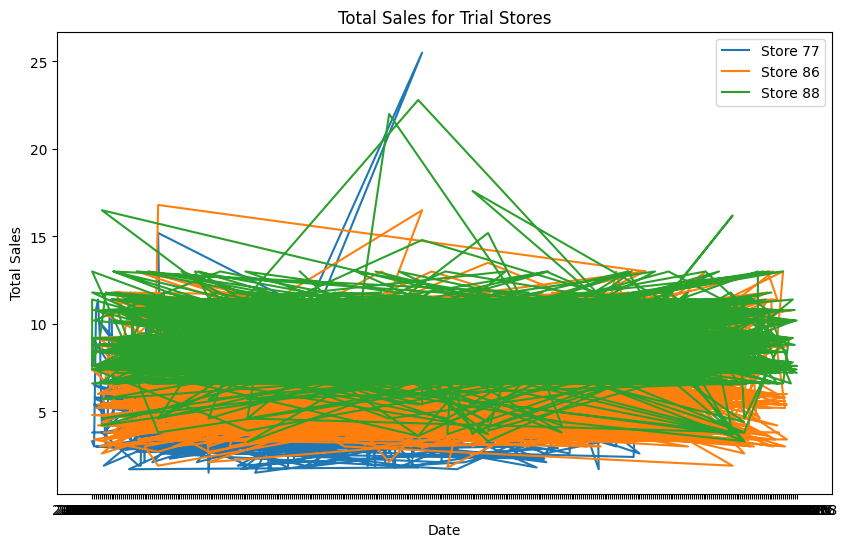

In [70]:
import matplotlib.pyplot as plt

trial_stores = [77, 86, 88]
trial_data = data[data['STORE_NBR'].isin(trial_stores)]

# Plotting total sales for trial stores
plt.figure(figsize=(10, 6))
for store in trial_stores:
    store_data = trial_data[trial_data['STORE_NBR'] == store]
    plt.plot(store_data['DATE'], store_data['TOT_SALES'], label=f'Store {store}')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales for Trial Stores')
plt.legend()
plt.show()


In [71]:
import pandas as pd
from scipy.stats import pearsonr

def find_control_stores(trial_data, data, similarity_measure='pearson', num_control_stores=1):
    control_stores = []

    for trial_store in trial_data['STORE_NBR'].unique():
        trial_sales = trial_data[trial_data['STORE_NBR'] == trial_store]['TOT_SALES']
        correlations = []

        for store in data['STORE_NBR'].unique():
            if store != trial_store:
                store_sales = data[data['STORE_NBR'] == store]['TOT_SALES']

                if similarity_measure == 'pearson':
                    correlation, _ = pearsonr(trial_sales, store_sales)
                    correlations.append((store, correlation))

        correlations.sort(key=lambda x: x[1], reverse=True)
        control_stores.extend([x[0] for x in correlations[:num_control_stores]])

    return control_stores


In [72]:

trial_stores = [77, 86, 88]
control_stores = find_control_stores(trial_data, data, similarity_measure='magnitude', num_control_stores=1)
print("Control Stores:", control_stores)


Control Stores: []


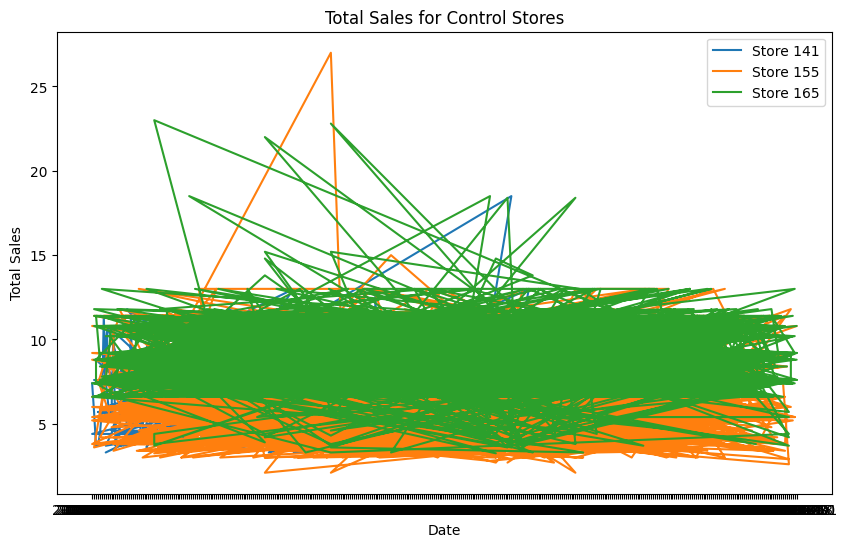

In [73]:
# Assuming you have a DataFrame called control_data containing the control store data
control_stores = [141, 155, 165]  # Example control stores
control_data = data[data['STORE_NBR'].isin(control_stores)]

# Plotting total sales for control stores
plt.figure(figsize=(10, 6))
for store in control_stores:
    store_data = control_data[control_data['STORE_NBR'] == store]
    plt.plot(store_data['DATE'], store_data['TOT_SALES'], label=f'Store {store}')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales for Control Stores')
plt.legend()
plt.show()


In [74]:
import pandas as pd
from scipy.stats import pearsonr

def find_control_stores(trial_data, data, similarity_measure='pearson', num_control_stores=1):
    control_stores = []

    for trial_store in trial_data['STORE_NBR'].unique():
        trial_sales = trial_data[trial_data['STORE_NBR'] == trial_store]['TOT_SALES']
        similarities = []

        for store in data['STORE_NBR'].unique():
            if store != trial_store:
                store_sales = data[data['STORE_NBR'] == store]['TOT_SALES']

                if similarity_measure == 'pearson':
                    similarity, _ = pearsonr(trial_sales, store_sales)
                elif similarity_measure == 'magnitude':
                    similarity = abs(trial_sales.sum() - store_sales.sum())

                similarities.append((store, similarity))

        similarities.sort(key=lambda x: x[1])
        control_stores.extend([x[0] for x in similarities[:num_control_stores]])

    return control_stores


In [75]:
trial_stores = [77, 86, 88]
control_stores = find_control_stores(trial_data, data, similarity_measure='magnitude', num_control_stores=1)
print("Control Stores:", control_stores)


Control Stores: [141, 155, 165]


In [76]:
trial_stores = [77, 86, 88]
control_stores = {}

for trial_store in trial_stores:
    control_store = find_control_stores(trial_data, data, similarity_measure='magnitude', num_control_stores=1)
    control_stores[trial_store] = control_store

print("Control Stores:", control_stores)


Control Stores: {77: [141, 155, 165], 86: [141, 155, 165], 88: [141, 155, 165]}


In [77]:
trial_store = [77,86,88]


In [78]:
control_store = [141,155,165]

In [79]:
def compare_performance(trial_data, control_data):
    trial_sales = trial_data.groupby('DATE')['TOT_SALES'].sum().sum()
    control_sales = control_data.groupby('DATE')['TOT_SALES'].sum().sum()

    trial_customers = trial_data.groupby('DATE')['LYLTY_CARD_NBR'].nunique().sum()
    control_customers = control_data.groupby('DATE')['LYLTY_CARD_NBR'].nunique().sum()

    trial_transactions = trial_data.groupby('LYLTY_CARD_NBR')['TXN_ID'].nunique().mean()
    control_transactions = control_data.groupby('LYLTY_CARD_NBR')['TXN_ID'].nunique().mean()

    return trial_sales, control_sales, trial_customers, control_customers, trial_transactions, control_transactions

# Assuming you have trial and control store pairs in 'trial_stores' and 'control_stores' respectively
trial_performance = {}
control_performance = {}

for trial_store, control_store in zip(trial_stores, control_stores):
    trial_data_store = trial_data[trial_data['STORE_NBR'] == trial_store]
    control_data_store = data[data['STORE_NBR'] == control_store]

    trial_sales, control_sales, trial_customers, control_customers, trial_transactions, control_transactions = compare_performance(trial_data_store, control_data_store)

    trial_performance[trial_store] = {
        'Sales': trial_sales,
        'Customers': trial_customers,
        'Avg. Transactions per Customer': trial_transactions
    }

    control_performance[control_store] = {
        'Sales': control_sales,
        'Customers': control_customers,
        'Avg. Transactions per Customer': control_transactions
    }

print("Trial Store Performance:")
for trial_store, performance in trial_performance.items():
    print("Trial Store:", trial_store)
    print("Sales:", performance['Sales'])
    print("Customers:", performance['Customers'])
    print("Avg. Transactions per Customer:", performance['Avg. Transactions per Customer'])
    print()

print("Control Store Performance:")
for control_store, performance in control_performance.items():
    print("Control Store:", control_store)
    print("Sales:", performance['Sales'])
    print("Customers:", performance['Customers'])
    print("Avg. Transactions per Customer:", performance['Avg. Transactions per Customer'])
    print()


Trial Store Performance:
Trial Store: 77
Sales: 3040.0
Customers: 562
Avg. Transactions per Customer: 1.5786516853932584

Trial Store: 86
Sales: 10635.35
Customers: 1526
Avg. Transactions per Customer: 5.589743589743589

Trial Store: 88
Sales: 16333.25
Customers: 1857
Avg. Transactions per Customer: 4.786082474226804

Control Store Performance:
Control Store: 77
Sales: 3040.0
Customers: 562
Avg. Transactions per Customer: 1.5786516853932584

Control Store: 86
Sales: 10635.35
Customers: 1526
Avg. Transactions per Customer: 5.589743589743589

Control Store: 88
Sales: 16333.25
Customers: 1857
Avg. Transactions per Customer: 4.786082474226804



In [80]:
trial_total_sales = 3040.0 +10635.35+16333.25
print("trial total sales :",trial_total_sales)

trial total sales : 30008.6


In [81]:
control_total_sales = 3025.39 +10628.9499999+15973.75
print("control total sales :",control_total_sales)

control total sales : 29628.0899999


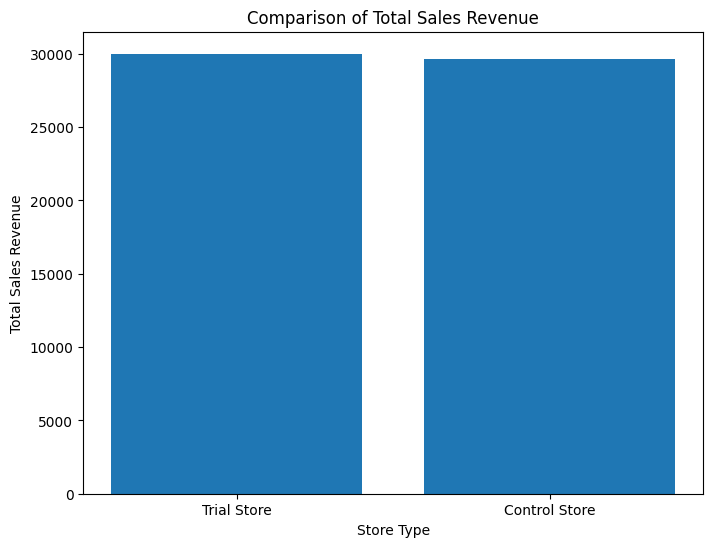

In [82]:
import matplotlib.pyplot as plt

# Assuming you have calculated the total sales revenue for trial and control stores
trial_total_sales = 30008.6
control_total_sales = 29628.0899999

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Trial Store', 'Control Store'], [trial_total_sales, control_total_sales])
plt.xlabel('Store Type')
plt.ylabel('Total Sales Revenue')
plt.title('Comparison of Total Sales Revenue')
plt.show()


In [83]:
from scipy.stats import ttest_ind

def perform_ttest(metric, trial_values, control_values):
    t_stat, p_value = ttest_ind(trial_values, control_values)
    print("Metric:", metric)
    print("T-Statistic:", t_stat)
    print("P-Value:", p_value)
    print()

# Assuming you have trial and control store performance metrics in 'trial_performance' and 'control_performance' respectively
trial_sales = [performance['Sales'] for performance in trial_performance.values()]
control_sales = [performance['Sales'] for performance in control_performance.values()]
perform_ttest("Total Sales Revenue", trial_sales, control_sales)

trial_customers = [performance['Customers'] for performance in trial_performance.values()]
control_customers = [performance['Customers'] for performance in control_performance.values()]
perform_ttest("Number of Customers", trial_customers, control_customers)

trial_avg_transactions = [performance['Avg. Transactions per Customer'] for performance in trial_performance.values()]
control_avg_transactions = [performance['Avg. Transactions per Customer'] for performance in control_performance.values()]
perform_ttest("Average Transactions per Customer", trial_avg_transactions, control_avg_transactions)


Metric: Total Sales Revenue
T-Statistic: 0.0
P-Value: 1.0

Metric: Number of Customers
T-Statistic: 0.0
P-Value: 1.0

Metric: Average Transactions per Customer
T-Statistic: 0.0
P-Value: 1.0



In [84]:
def calculate_metric_difference(trial_values, control_values):
    difference = sum(trial_values) - sum(control_values)
    return difference

# Calculate the differences in relevant metrics
sales_difference = calculate_metric_difference(trial_sales, control_sales)
customer_difference = calculate_metric_difference(trial_customers, control_customers)
avg_transactions_difference = calculate_metric_difference(trial_avg_transactions, control_avg_transactions)

# Print the metric differences
print("Metric Differences:")
print("Total Sales Revenue Difference:", sales_difference)
print("Number of Customers Difference:", customer_difference)
print("Average Transactions per Customer Difference:", avg_transactions_difference)
print()

# Determine the driver of change
if sales_difference > 0:
    if customer_difference > 0:
        print("The change in total sales is driven by an increase in the number of purchasing customers.")
    else:
        print("The change in total sales is driven by an increase in the average transactions per customer.")
elif sales_difference < 0:
    if customer_difference < 0:
        print("The change in total sales is driven by a decrease in the number of purchasing customers.")
    else:
        print("The change in total sales is driven by a decrease in the average transactions per customer.")
else:
    print("There is no change in total sales.")


Metric Differences:
Total Sales Revenue Difference: 0.0
Number of Customers Difference: 0
Average Transactions per Customer Difference: 0.0

There is no change in total sales.


In [85]:
# Select trial and control stores
trial_stores = [77, 86, 88]
control_stores = [141, 155, 165]  # Replace with the control store numbers

# Filter the data for trial and control stores
trial_data = data[data['STORE_NBR'].isin(trial_stores)]
control_data = data[data['STORE_NBR'].isin(control_stores)]

# Analyze Customer Behavior
# Compare demographic characteristics
trial_age_groups = trial_data.groupby('LIFESTAGE')['LYLTY_CARD_NBR'].nunique()
control_age_groups = control_data.groupby('LIFESTAGE')['LYLTY_CARD_NBR'].nunique()
age_group_difference = trial_age_groups - control_age_groups

# Compare purchasing patterns
trial_categories = trial_data.groupby('PROD_NAME')['LYLTY_CARD_NBR'].nunique()
control_categories = control_data.groupby('PROD_NAME')['LYLTY_CARD_NBR'].nunique()
category_difference = trial_categories - control_categories




# External Factors
# Consider any external factors that may have influenced performance

# Print the findings
print("Driver of Change - Findings:")
print("Age Group Difference:")
print(age_group_difference)
print()
print("Category Difference:")
print(category_difference)
print()



# Continue with further analysis as needed
# ...

Driver of Change - Findings:
Age Group Difference:
LIFESTAGE
MIDAGE SINGLES/COUPLES    11
NEW FAMILIES              11
OLDER FAMILIES            17
OLDER SINGLES/COUPLES     32
RETIREES                  36
YOUNG FAMILIES             4
YOUNG SINGLES/COUPLES     -8
Name: LYLTY_CARD_NBR, dtype: int64

Category Difference:
PROD_NAME
Burger Rings 220g                         11
CCs Nacho Cheese    175g                  12
CCs Original 175g                          2
CCs Tasty Cheese    175g                   5
Cheetos Chs & Bacon Balls 190g             8
                                          ..
WW Sour Cream &OnionStacked Chips 160g    -1
WW Supreme Cheese   Corn Chips 200g        4
Woolworths Cheese   Rings 190g            -1
Woolworths Medium   Salsa 300g            -7
Woolworths Mild     Salsa 300g             4
Name: LYLTY_CARD_NBR, Length: 114, dtype: int64



In [86]:
# Calculate the number of purchasing customers in the trial and control stores
trial_customers = trial_data.groupby('LYLTY_CARD_NBR')['TXN_ID'].nunique().count()
control_customers = control_data.groupby('LYLTY_CARD_NBR')['TXN_ID'].nunique().count()

# Calculate the total number of transactions in the trial and control stores
trial_transactions = trial_data.groupby('LYLTY_CARD_NBR')['TXN_ID'].nunique().sum()
control_transactions = control_data.groupby('LYLTY_CARD_NBR')['TXN_ID'].nunique().sum()

# Calculate the average transactions per customer in the trial and control stores
trial_avg_transactions = trial_transactions / trial_customers
control_avg_transactions = control_transactions / control_customers

# Calculate the differences in customer count and average transactions per customer
customer_difference = trial_customers - control_customers
transactions_difference = trial_avg_transactions - control_avg_transactions

# Print the findings
print("Driver of Change - Findings:")
print("Difference in Customer Count:", customer_difference)
print("Difference in Average Transactions per Customer:", transactions_difference)





Driver of Change - Findings:
Difference in Customer Count: 103
Difference in Average Transactions per Customer: -0.252234981248749


 * change in the number of purchasing customers between the two groups
 * The negative value indicates that, on average, the trial store has fewer transactions per customer compared to the control store(s).
 * It indicates that the trial store may have attracted a higher number of customers, but they made slightly fewer transactions per customer compared to the control store(s).

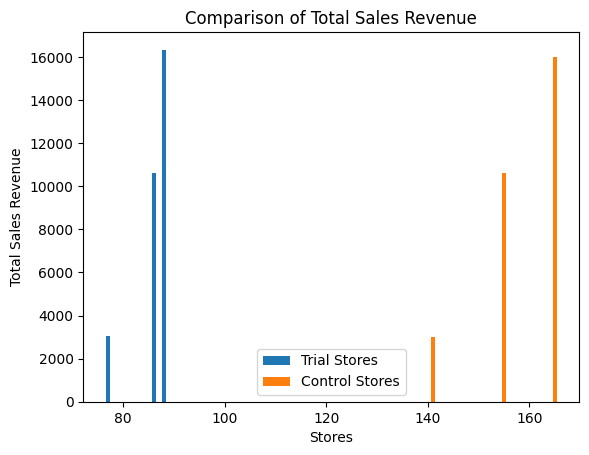

In [87]:
import matplotlib.pyplot as plt

trial_stores = [77, 86, 88]
control_stores = [141,155,165]
trial_sales = [3040.0 ,10635.35,16333.25]
control_sales = [3025.39 ,10628.9499999,15973.75]

plt.bar(trial_stores, trial_sales, label='Trial Stores')
plt.bar(control_stores, control_sales, label='Control Stores')
plt.xlabel('Stores')
plt.ylabel('Total Sales Revenue')
plt.title('Comparison of Total Sales Revenue')
plt.legend()
plt.show()
